<a href="https://colab.research.google.com/github/Ikuesan/Projects/blob/main/Hand_written_numbers_classification_with_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [18]:
#using the built MNIST database
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [19]:
#normalizing pixel values to the "0 - 1" range
train_images = train_images / 255.0
test_images = test_images / 255.0

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
#adding a new dimension to fit the CNN required format
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [23]:
train_images.shape

(60000, 28, 28, 1)

In [24]:
#model building
model = models.Sequential([
                layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Flatten(),
                layers.Dense(64, activation='relu'),
                layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.9049 - loss: 0.3153 - val_accuracy: 0.9834 - val_loss: 0.0534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - accuracy: 0.9850 - loss: 0.0495 - val_accuracy: 0.9865 - val_loss: 0.0419
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 32ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9870 - val_loss: 0.0378
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9927 - loss: 0.0248 - val_accuracy: 0.9902 - val_loss: 0.0304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9948 - loss: 0.0157 - val_accuracy: 0.9916 - val_loss: 0.0251


In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9897 - loss: 0.0321
Test accuracy: 0.9916
Test loss: 0.0251


In [30]:
import numpy as np
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [31]:
predictions[0]

array([5.0223759e-11, 7.2901678e-11, 3.0437770e-09, 2.0447713e-08,
       3.8110201e-10, 3.0649813e-10, 8.7373769e-15, 9.9999994e-01,
       7.5164631e-11, 2.0463943e-08], dtype=float32)

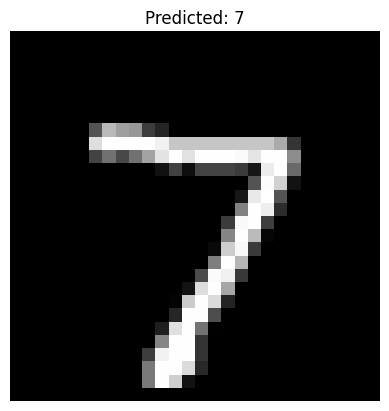

In [34]:
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.axis('off')
plt.show()